# Movie ratings - How have they changed throughout the century?

This project uses ratings provided by Rotten Tomatoes to see whether movies have historically improved or worsened throughout the 20th and into the 21st century.

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
movies = pd.read_csv('rotten_tomatoes_movies.csv')

Below is our data cleaning process. It involves formatting some columns, creating new columns and correcting some movie information. The entire database is ready to go after running the below set

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


movies = pd.read_csv('rotten_tomatoes_movies.csv')
movies.rating = np.where((movies.rating.str.endswith(")")), movies.rating.str.rstrip(")"), movies.rating)
movies.genre = movies.genre.fillna("No Genre")
movies.cast = movies.cast.fillna("None listed")
movies.in_theaters_date = movies.in_theaters_date.fillna("0") #so we can convert to int
movies.on_streaming_date = movies.on_streaming_date.fillna("Cannot stream")
movies.runtime_in_minutes = np.where((movies.movie_title == "Terror Tract"), 96, movies.runtime_in_minutes)
movies.runtime_in_minutes = np.where((movies.movie_title == "Love on the Run"), 94, movies.runtime_in_minutes)
movies.in_theaters_date = movies.in_theaters_date.fillna("0000-00-00")
movies.runtime_in_minutes = np.where((movies.movie_title == "The Border"), 108, movies.runtime_in_minutes)
movies.runtime_in_minutes = np.where((movies.movie_title == "The Prophecy"), 98, movies.runtime_in_minutes)
movies.runtime_in_minutes = np.where((movies.movie_title == "The Barbarian Invasions (Les Invasions barbares)"), 99, movies.runtime_in_minutes)
movies.runtime_in_minutes = np.where((movies.movie_title == "Hellraiser: Deader"), 88, movies.runtime_in_minutes)
movies.runtime_in_minutes = np.where((movies.movie_title == "Hellraiser: Hellseeker"), 86, movies.runtime_in_minutes)
movies.runtime_in_minutes = np.where((movies.movie_title == "Hellraiser: Hellworld"), 91, movies.runtime_in_minutes)
movies.runtime_in_minutes = np.where((movies.movie_title == "Rory O'Shea Was Here"), 104, movies.runtime_in_minutes)

movies["Release_Year"] = movies.in_theaters_date.str.split("-").str[0]#.astype(int)
decadestring = movies.Release_Year.str.split("")
movies["Decade"] = (decadestring.str[1] + decadestring.str[2] + decadestring.str[3] + "0")
movies.in_theaters_date = pd.to_datetime(movies.in_theaters_date, format='%Y-%m-%d', errors='coerce')
movies.on_streaming_date = pd.to_datetime(movies.on_streaming_date, format='%Y-%m-%d', errors='coerce')
movies["Release_Year"] = movies.Release_Year.astype(int)
movies['Stream_delay'] = movies.on_streaming_date.sub(movies.in_theaters_date, axis=0)
movies.Stream_delay = movies.Stream_delay.dt.days


movies = movies.drop("rotten_tomatoes_link", axis=1)
movies = movies.drop("poster_image_url", axis=1)
movies = movies.drop("movie_info", axis=1)
movies = movies.drop("critics_consensus", axis=1)
movies = movies.drop("tomatometer_count", axis=1)
movies = movies.drop("audience_top_critics_count", axis=1)
movies = movies.drop("audience_fresh_critics_count", axis=1)
movies = movies.drop("audience_rotten_critics_count", axis=1)
movies.Decade = np.where((movies.Decade == "00"), "2000", movies.Decade)
movies.Decade = np.where((movies.Decade == "10"), "2010", movies.Decade)

movies = movies.drop_duplicates()

# Have a brief look at the new dataframe

In [26]:
movies.head()

,movie_title,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,audience_status,audience_rating,audience_count,Release_Year,Decade,Stream_delay
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,Spilled,53.0,254287.0,2010,2010,137.0
1,Please Give,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,Upright,64.0,11567.0,2010,2010,172.0
2,10,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,Spilled,53.0,14670.0,1979,1970,6536.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,Upright,97.0,105000.0,1957,1950,16033.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,Upright,74.0,68860.0,1954,1950,18036.0


We chose to ignore the 1910s due to the tiny number of movies available at the time

In [5]:
movies[(movies.Release_Year < 1920) & (movies.Release_Year > 1909)] #ignore this decade

,movie_title,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,audience_status,audience_rating,audience_count,Release_Year,Decade,Stream_delay
334,Broken Blossoms,NR,"Classics, Drama, Romance",D.W. Griffith,D.W. Griffith,"Richard Barthelmess, Lillian Gish, Donald Cris...",1919-05-13,1999-05-11,102.0,Kino on Video,Fresh,95,Upright,71.0,3798.0,1919,1910,29218.0
509,Intolerance,PG,Classics,D.W. Griffith,"D.W. Griffith, Tod Browning","Lillian Gish, Mae Marsh, Robert Harron, Consta...",1916-09-05,2002-12-10,175.0,Cohen Media Group,Fresh,97,Upright,77.0,4894.0,1916,1910,31507.0
3442,The Birth of a Nation,G,"Classics, Drama",D.W. Griffith,"Frank Woods, D.W. Griffith, Frank E. Woods, Th...","Henry B. Walthall, Lillian Gish, Mae Marsh, Mi...",1915-03-03,2004-06-29,192.0,Gravitas,Fresh,98,Spilled,56.0,4757.0,1915,1910,32626.0
3999,Cabiria,NR,"Art House & International, Classics, Drama",Giovanni Pastrone,Gabriele D'Annunzio,"Alex Bernard, Italia Almirante-Manzini, Lidia ...",1914-06-01,2000-11-07,181.0,Itala Film,Fresh,100,Upright,69.0,1151.0,1914,1910,31571.0
6232,A Fool There Was,NR,"Classics, Drama","Frank Powell, Clarence G. Badger","Roy L. McCardell, Frank Powell","Mabel Frenyer, Theda Bara, Baby Runa Hodges, E...",1915-01-01,2002-04-02,75.0,Box Office Attractions,Fresh,80,Spilled,56.0,1218.0,1915,1910,31868.0
12928,"Spiders, Part 1: The Golden Lake (Die Spinnen,...",NR,"Action & Adventure, Western",Fritz Lang,NaN,"Lil Dagover, Carl de Vogt, Georg John, Ressel ...",1919-10-03,1999-08-17,137.0,NaN,Fresh,100,Spilled,52.0,132.0,1919,1910,29173.0


Below is a demonstration of how fast films have become available to stream over the past 10 years

C:\Users\lewis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


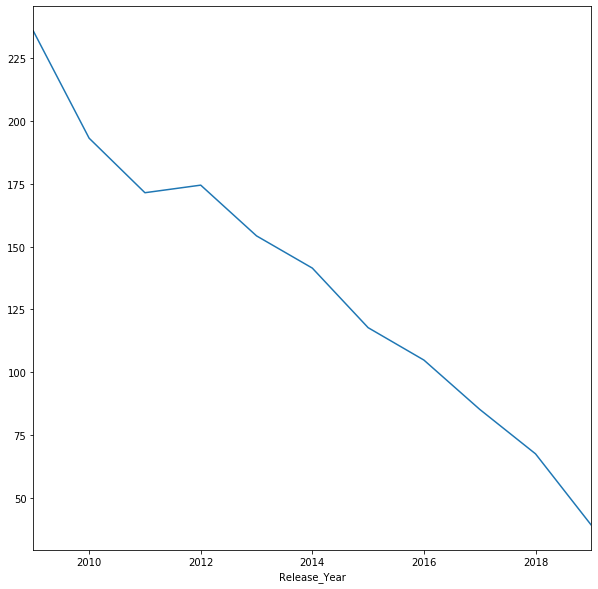

In [188]:
#DELAY BETWEEN RELEASE AND STREAMING SINCE 2009
stream_delay = movies[movies.Stream_delay >= 0]
ignoring10s = stream_delay[(movies.Release_Year > 2008)]
Year = ignoring10s.groupby("Release_Year")
yearstreams = Year["Stream_delay"].mean()
yearstreams.plot(kind="line", figsize = (10,10))

In [217]:
#runtime variance
runtime = movies[movies.runtime_in_minutes > 30]
runtime.runtime_in_minutes.describe()

count    16455.000000
mean       102.429960
std         19.576585
min         31.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        480.000000
Name: runtime_in_minutes, dtype: float64

The following graph shows the average rating for each decade over the past century

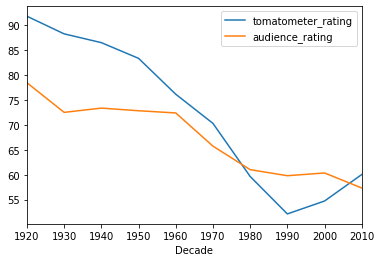

In [6]:
#compares audience and critic ratings over decades

ignoring10s = movies[(movies.Release_Year > 1919) & (movies.Release_Year < 2020)]
decade = ignoring10s.groupby("Decade")
decaderatings = decade[["tomatometer_rating", "audience_rating"]].mean()
decaderatings.plot(kind="line")

As you can see, film ratings plummeted down to the 90s but have since been recovering with the turn of the 21st century. It would be interesting to see whether the audience and critic perspectives continue to converge.

The next graph shows the change in ratings over the past 10 years, note that although it is quite volatile, it is still a general upwards trend (and still above the 90s)

C:\Users\lewis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


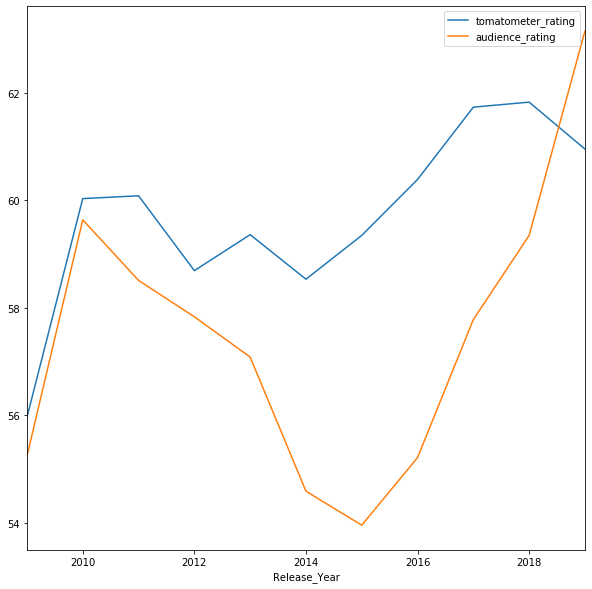

In [222]:
stream_delay = movies[movies.Stream_delay >= 0]
ignoring10s = stream_delay[(movies.Release_Year > 2008)]
Year = ignoring10s.groupby("Release_Year")
yearratings = Year["tomatometer_rating", "audience_rating"].mean()
yearratings.plot(kind="line", figsize = (10,10))

2015 was particularly bad. For reference, 2015 saw the releases of 50 Shades of Grey, Avengers: Age of Ultron, Star Wars: Force Awakens and James Bond: Spectre. The latter 3 have been hotly debated as the worst of their respective series and are the most well known. Nevertheless, the rating drop isn't that significant

Below we provide some scope to the whole project - the graph demonstartes the exponential increase in audience viewership which is a reflection of the population growth. Keep this trend in mind as it seems to appear in later analysis too.

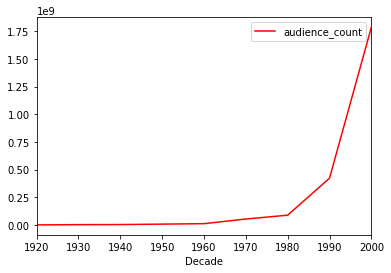

In [8]:
#compares audience number with decades

ignoring10s = movies[(movies.Release_Year > 1919) & (movies.Release_Year < 2010)]
decade = ignoring10s.groupby("Decade")
decadeviews = decade[["audience_count"]].sum()
decadeviews.plot(kind="line", color = 'r')
#lack of information for 2010+? would like to start from 20 and go up

2010 and onwards was missing a lot of audience data so has not been included.

Further analysis could investigate the relationship between the demand for films and the rating for films. Like the current saturation of social media, as services become oversubscribed the quality of those services declines. Similarly, as more and more movies are being released and watched, the average rating also declines.

In [63]:
#correlation between audience count and audience rating
ignoring10s = movies[(movies.Release_Year > 1919) & (movies.Release_Year < 2010)]
#missing audience data for 2010+
decade = ignoring10s.groupby("Decade")
decadeviewsandratings = decade[["audience_count", "tomatometer_rating"]].mean()
decadeviewsandratings.corr() #pretty strong

,audience_count,tomatometer_rating
audience_count,1.000000,-0.681605
tomatometer_rating,-0.681605,1.000000


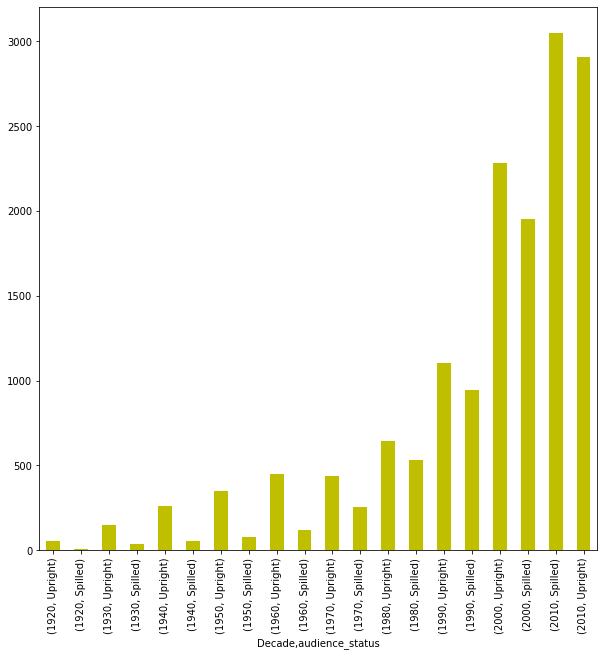

In [34]:
#This is audience ratings throughout the decades

ignoring1910s = movies[movies.Release_Year > 1919]
decade = ignoring1910s.groupby("Decade")
decadestatus = decade.audience_status.value_counts()
decadestatus.plot(kind="bar", color = 'y', figsize = (10,10))
#2010 only decade to have more bad movies than good?
#perhaps make upright as a percentage of films and only show that?


Note the exponential increase for all columns. Also, the only decade to feature more Spilled movies than Upright is the last decade, 2010+.

The same analysis is now performed for critics reviews. Certified Fresh means 75% liked the movie, Fresh is 60% liked the movie and Rotten is less than 60%.

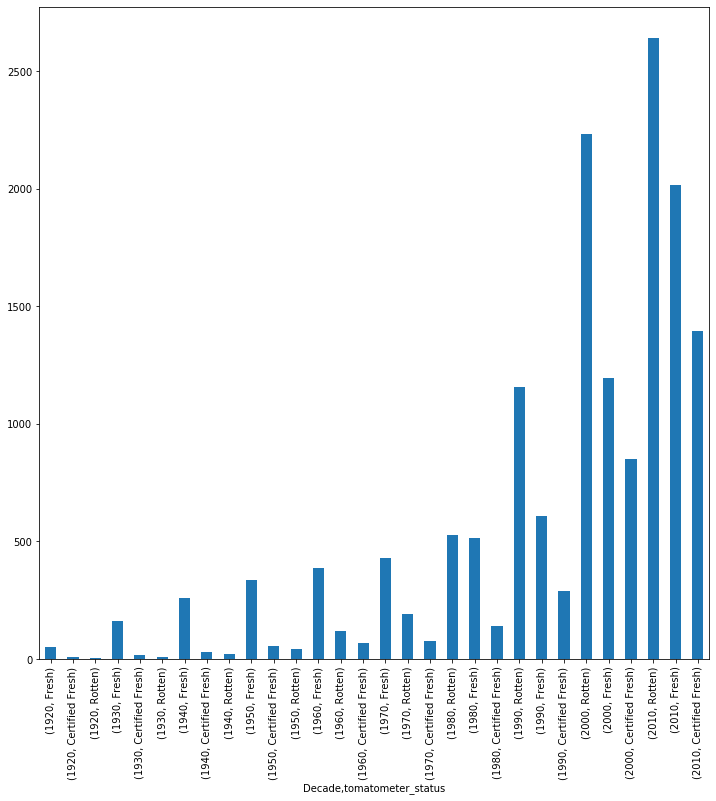

In [30]:
#Critic ratings throughout the decades
ignoring10s = movies[(movies.Release_Year > 1919)]
decade = ignoring10s.groupby("Decade")
decadestatus2 = decade.tomatometer_status.value_counts()
decadestatus2.plot(kind="bar", figsize=(12,12))
decadestatus2.

The 1960s shows Rotten overtaking Certified Fresh and the 1980s Rotten becomes the most common result. Again, the exponential growth can be observed.

This is just a brief viewing of the average film rating for each writer. Further analysis could show how this also changes throughout the decades.

In [9]:
writers = movies.groupby("writers")
writers["tomatometer_rating"].mean()

writers
A. Dean Bell                                                       68.0
A.B. Guthrie Jr., Jack Sher                                        97.0
A.I. Bezzerides                                                   100.0
A.I. Bezzerides, Nicholas Ray                                      94.0
A.J. Carothers                                                     50.0
                                                                  ...  
Álex de la Iglesia, Jorge Guerricaechevarría                       49.5
Álvaro Rodríguez                                                   60.0
Émile Gaudreault, Steve Galluccio                                  32.0
Émile Gaudreault, Sylvie Bouchard, Lowell Ganz, Babaloo Mandel     64.0
Éva Gárdos                                                         55.0
Name: tomatometer_rating, Length: 12121, dtype: float64

Below is a pie chart of the total number of each age rating in each decade. To choose which decade you'd like to observe, simply type the decade number into the DecadeRating() function. Note, the year 2000 and 2010 are found by typing 100 and 110.

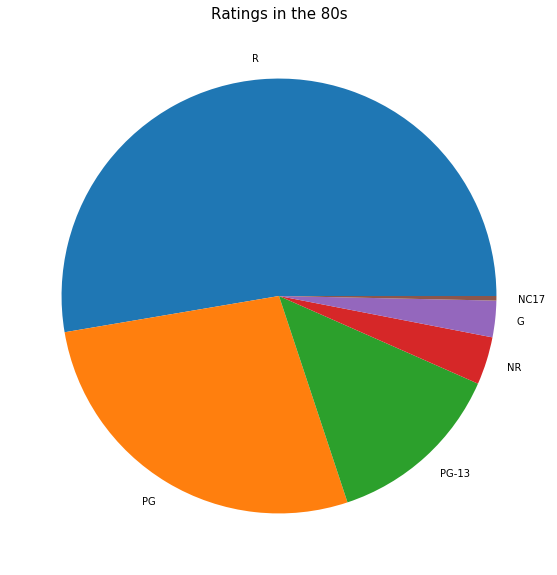

In [20]:
#THIS SHOWS RATINGS ACROSS DECADES

def DecadeRating(decade):
    moviedecade = movies[(movies.Release_Year > (1899 + decade )) & (movies.Release_Year < (1910 + decade))]
    Rating = moviedecade.rating.value_counts().plot(kind='pie', figsize = (10,10))
    Rating.set_title('Ratings in the ' + str(decade) + "s", fontsize=15)
    Rating.set_ylabel('')

DecadeRating(80)
#perhaps a line chart for comparison?

Mature (R) films have been dominant throughout history their is a general rise in PG related films in the market. This is often referred to being due to the rise in piracy; adults and mature teenagers pirate films far more and hence a way to ensure your movie is viewed legally, you create PG and PG-13 rated movies as younger generations are yet to be exposed to piracy. As such, the rise in Superhero movies has been a general success. Please note that NR means No Rating and NC17 is a rating specific to some regions and so the consistency of the data is not perfect.

Lastly, we looked at the most popular studios, directors, genres, writers and cast. These could all be used and compared throughout history too in further analysis but is slightly off-topic for our main focus.


To conclude, films have generally gotten worse but the 21st century has shown improvements. This may be due to the industry being unable to initally cope with the demand and the lack of technology, reaching a trough in quality in the 90s, but with the rapid technological progression from the year 2000, movie ratings appear to be on the rise for the very first time in history.

In [31]:
#STUDIO

movies.studio_name.value_counts()

Paramount Pictures          497
Warner Bros. Pictures       492
Universal Pictures          469
20th Century Fox            414
IFC Films                   398
                           ... 
Monica Beach Enterprises      1
KinoNation                    1
FilmWorks Entertainment       1
NEON/Hulu                     1
Peace Arch Films              1
Name: studio_name, Length: 2886, dtype: int64

In [24]:
#DIRECTORS

movies.directors.value_counts()

Woody Allen                          36
Alfred Hitchcock                     36
Clint Eastwood                       35
Steven Spielberg                     32
Sidney Lumet                         30
                                     ..
Suri Krishnamma                       1
Nick Whitfield                        1
Ellen Kuras, Thavisouk Phrasavath     1
Serge Bromberg, Ruxandra Medrea       1
Fred Grivois                          1
Name: directors, Length: 8314, dtype: int64

In [39]:
#THIS COUNTS WRITERS

movies.writers.value_counts()

[Woody Allen]                               33
[Werner Herzog]                             19
[Tyler Perry]                               19
[Neil Simon]                                19
[Ingmar Bergman]                            18
                                            ..
[Patrick Horvath, Dallas Richard Hallam]     1
[Simon Rose, Declan Hughes, John Brown]      1
[Dudley Nichols, Philip Dunne]               1
[Tamzin Rafn]                                1
[Andrew J. Smith, Alex Smith]                1
Name: writers, Length: 12121, dtype: int64

In [17]:
#THIS COUNTS GENRES

movies.genre = movies.genre.str.split(", ")
genres = movies.genre #counting the number each time a genre appears, how about in a decade etc? effort but could do
counting_genres = pd.Series(sum([item for item in genres], [])).value_counts()
counting_genres

Drama                        9005
Comedy                       5385
Action & Adventure           3353
Mystery & Suspense           3331
Art House & International    2407
Documentary                  1916
Horror                       1905
Romance                      1807
Science Fiction & Fantasy    1743
Classics                     1578
Special Interest             1219
Kids & Family                1067
Musical & Performing Arts     976
Animation                     565
Western                       283
Television                    258
Sports & Fitness              175
Cult Movies                   100
Faith & Spirituality           78
Gay & Lesbian                  68
No Genre                       17
Anime & Manga                  15
dtype: int64

In [42]:
#THIS COUNTS ALL ACTORS IN MOVIES

movies.cast = movies.cast.str.split(", ") #takes far too long to run #perhaps ignore one-time appearances? but can't ignore
#one-time appearances until they've been counted.... >>

cast = movies.cast 
counting_cast = pd.Series(sum([item for item in cast], [])).value_counts()
counting_cast


None listed           284
Jr.                   115
Samuel L. Jackson     105
Bruce Willis           87
Robert De Niro         87
                     ... 
Samantha Reed           1
Wolfgang Kuhnemann      1
Dominic Carter          1
Thomas Rothman          1
Bill Brooks             1
Length: 198667, dtype: int64